<h1> 카드매출 데이터 전처리(2)
    
    1. Isolation Forest를 사용하여 이상치 제거
    2. 정규화
    3. 각각 그래프로 표현

In [1]:
import numpy as np
import pandas as pd

In [3]:
scatter_graph = pd.read_csv('C:/Users/82108/Downloads/빅콘테스트 파일/카드메출데이터/CARD_SPENDING/Pre_cardData각 지역별 데이터.csv')

In [5]:
scatter_graph

,Dates,GU_cd,USE_CNT,USE_AMT
0,20180401,11110515,8527,112246
1,20180401,11110530,28413,668123
2,20180401,11110540,10466,206023
3,20180401,11110550,3436,87586
4,20180401,11110560,25118,629280
5,20180401,11110570,2063,51380
6,20180401,11110580,3313,139837
7,20180401,11110600,5595,101847
8,20180401,11110615,81738,2277343
9,20180401,11110630,17777,291444


In [25]:
dong = []
dong_name=[]
i = 0
for n1 , group in scatter_graph.groupby(['GU_cd']):
    dong.append(group.reset_index())
    dong_name.append(n1)

<h2> IsolationForest 적용

In [26]:
from sklearn.ensemble import IsolationForest
i = 0
j_new = []
#for j in scatter_graph:
IF = IsolationForest(random_state=1)
for j in dong:
    
    IF.fit(j[["USE_CNT" , "USE_AMT"]])

    y_pred_outliers = IF.predict(j[["USE_CNT" , "USE_AMT"]])
    out = pd.DataFrame(y_pred_outliers)
    out = out.rename(columns={0:"out"})
    j_new.append(pd.concat([j,out],1))
    i+=1


C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\82108\Anaconda3\lib\site-pa

C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\82108\Anaconda3\lib\site-packages\sklearn\

C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\82108\Anaconda3\lib\site-packages\sklearn\

C:\Users\82108\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [117]:
type(j_new[1])

pandas.core.frame.DataFrame

In [32]:
for k in range(len(j_new)):
    j_new[k] = j_new[k][j_new[k].out != -1]    

In [110]:
len(j_new[1].shape)

2

In [140]:
df_j_new= pd.DataFrame()
#type(df_j_new)
for j in j_new:
    #df_j_new = pd.concat([k for k in j_new],axis=0,keys=["index","Dates","GU_cd","USE_CNT","USE_AMT","out"])
    #if j['GU_cd'].values is not df_j_new['GU_cd'].values:
    df_j_new=df_j_new.append(j)

In [150]:
df_j_new.to_csv('C:/Users/82108/Downloads/빅콘테스트 파일/카드메출데이터/산점도그래프/IsolationForest outlier제거 데이터프레임최종.csv', index= False)

In [143]:
del df_j_new['index']
del df_j_new['out']

In [145]:
df_j_new["Years"] = df_j_new["Dates"]
years = [ int(str(yyyymmdd)[:4]) for yyyymmdd in df_j_new["Years"]]
df_j_new['Years']=years
df_j_new["Months"] = df_j_new["Dates"]
months = [int(str(mmdd)[4:6]) for mmdd in df_j_new["Dates"]]
df_j_new["Months"] = months
df_j_new["Days"] = df_j_new["Dates"]
days = [int(str(mmdd)[6:]) for mmdd in df_j_new["Dates"]]
df_j_new["Days"] = days

<h2> 산점도 IsolationForest적용후 산점도 그래프

C:\Users\82108\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


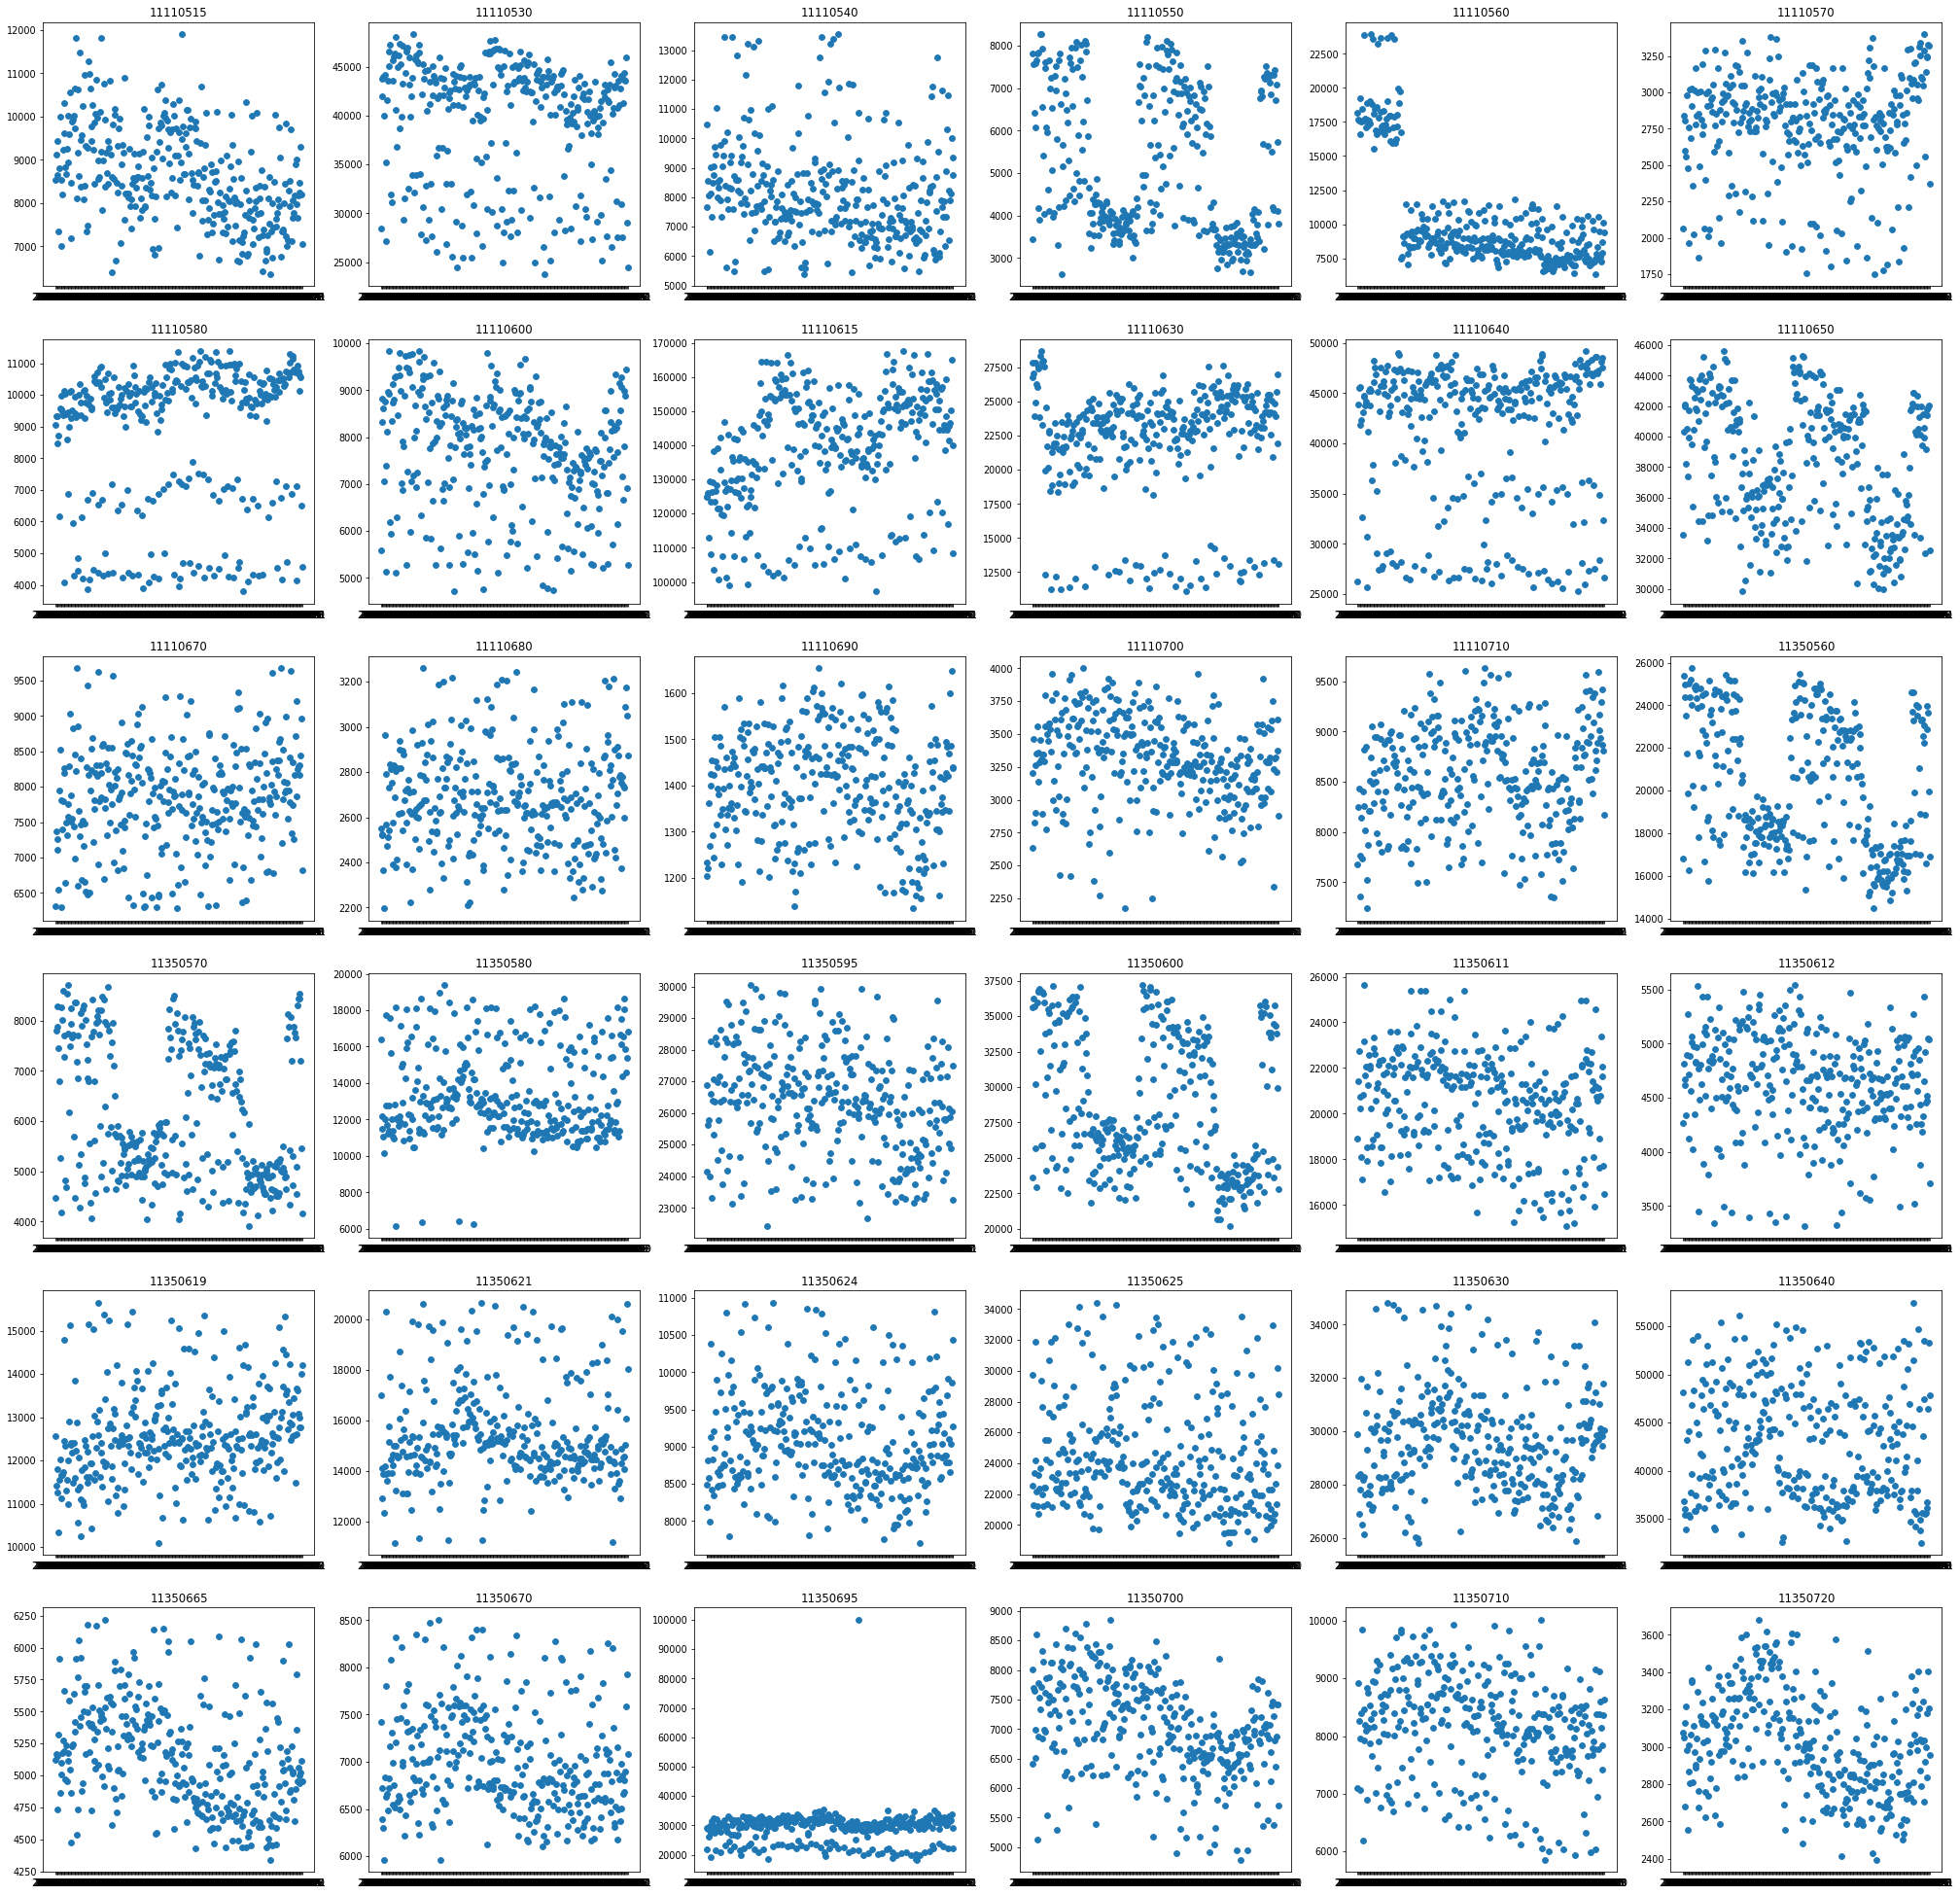

In [149]:
num = 0
my_dpi = 70
plt.figure(figsize=(36,36),dpi = my_dpi)

for n1,group in df_j_new.groupby(['GU_cd']):
    #print(group)
    num += 1
    plt.subplot(6,6,num)
    group['Dates']=group['Dates'].astype('str')
    plt.xticks(rotation = 0)
    #lt.text(0.06, 3, i, ha = 'center', va = 'center', rotation = 'horizontal')
    plt.title(n1)
    #a = groups.plot.scatter(figsize = (70,60))
    plt.scatter(group['Dates'],group['USE_CNT'] , label = '지역별결제총건수')
plt.savefig("C:/Users/82108/Downloads/빅콘테스트 파일/카드메출데이터/산점도그래프/산점도 IsolationForest적용 + outlier 제거 최종그래프.png", dpi = my_dpi+2, bbox_inches = 'tight', pad_inches = 0.0)

In [148]:
import matplotlib.pyplot as plt

In [151]:
df_j_new_CNT = pd.DataFrame(df_j_new , columns = ["USE_CNT"])

In [152]:
df_j_new_CNT.head(10000)

,USE_CNT
0,8527
1,9122
2,8640
3,9436
4,7352
5,8797
6,9990
7,7017
8,8533
9,8209


<h3> 정규화 적용 후 산점도 그래프

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_j_new_CNT)
X_scaled2 = scaler.transform(df_j_new_CNT)
np.mean(X_scaled2), np.std(X_scaled2)

C:\Users\82108\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\82108\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


(9.627950349052848e-18, 1.0)

In [154]:
len(X_scaled2)

11808

In [155]:
df_j_new['Norm_USE_CNT'] = X_scaled2

C:\Users\82108\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


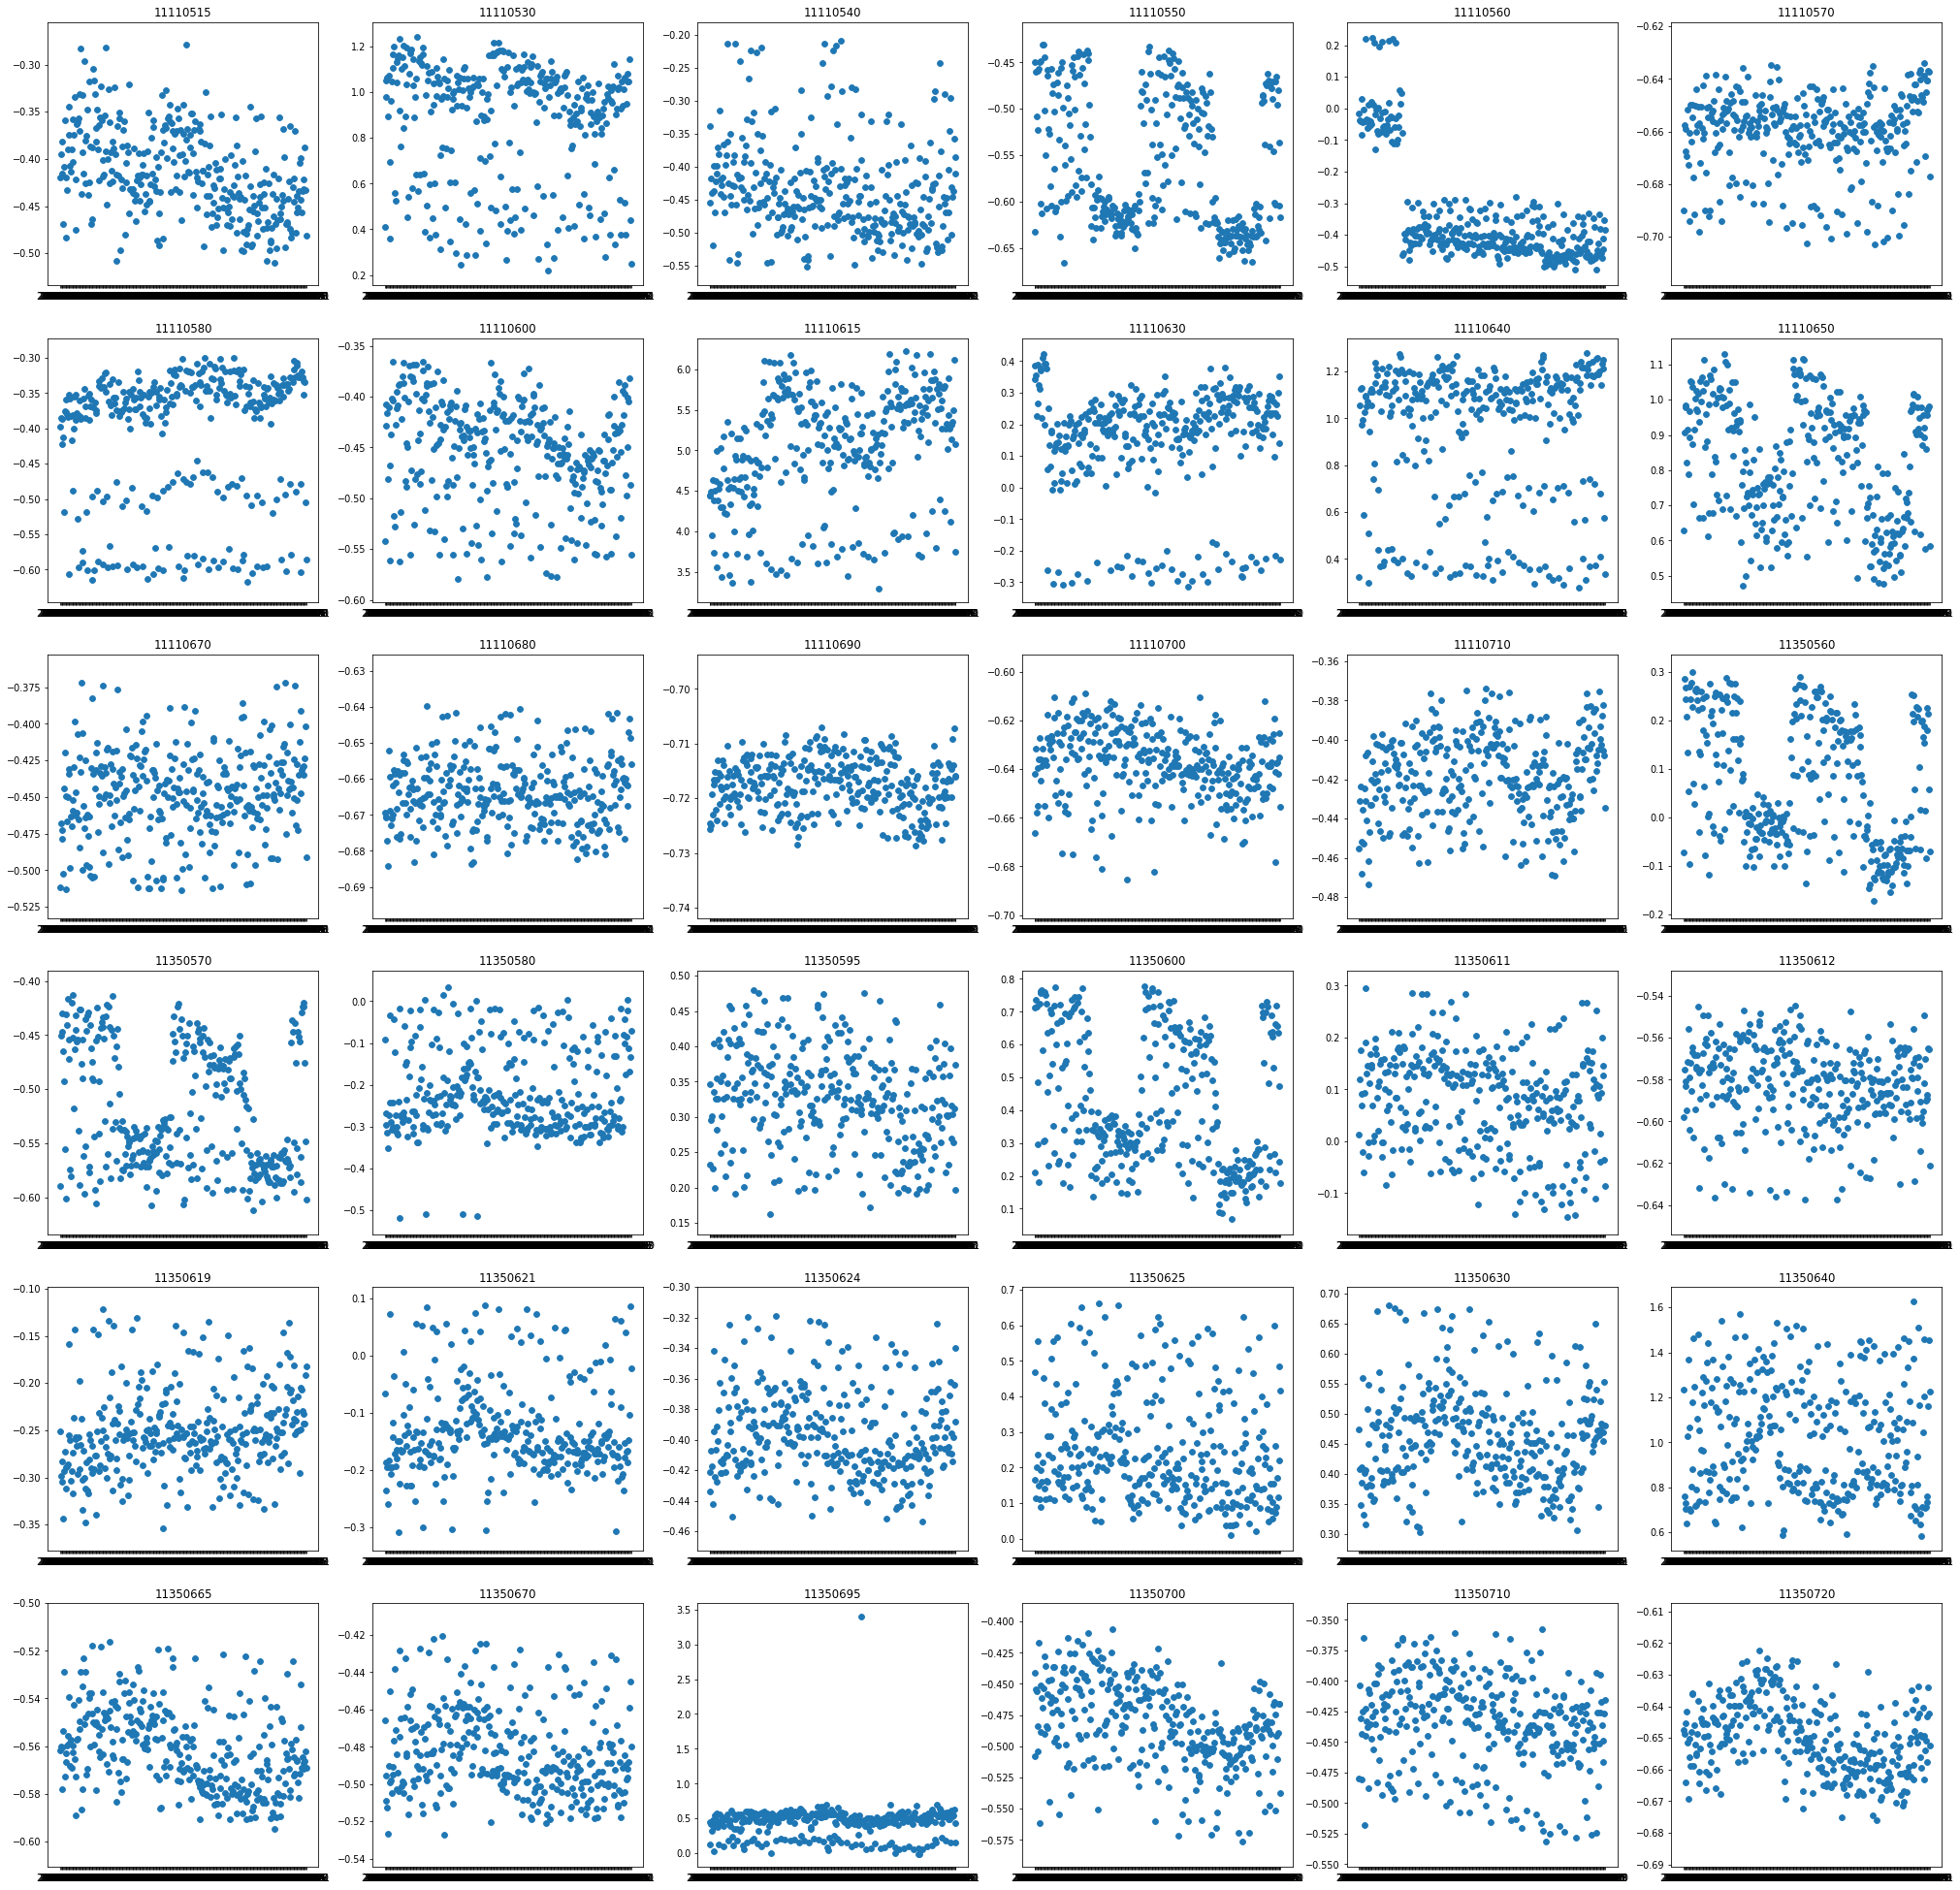

In [157]:
num = 0
my_dpi = 70
plt.figure(figsize=(36,36),dpi = my_dpi)

for n1,group in df_j_new.groupby(['GU_cd']):
    #print(group)
    num += 1
    plt.subplot(6,6,num)
    group['Dates']=group['Dates'].astype('str')
    plt.xticks(rotation = 0)
    #lt.text(0.06, 3, i, ha = 'center', va = 'center', rotation = 'horizontal')
    plt.title(n1)
    #a = groups.plot.scatter(figsize = (70,60))
    plt.scatter(group['Dates'],group['Norm_USE_CNT'] , label = '지역별결제총건수')
plt.savefig("C:/Users/82108/Downloads/빅콘테스트 파일/카드메출데이터/산점도그래프/산점도 IsolationForest적용 + outlier 제거 + std정규화 그래프.png", dpi = my_dpi+2, bbox_inches = 'tight', pad_inches = 0.0)

In [159]:
df_j_new.to_csv('C:/Users/82108/Downloads/빅콘테스트 파일/카드메출데이터/산점도그래프/IsolationForest outlier제거 + std정규화.csv', index= False)